In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 보험료 예측하는 linear regression 모델을 만들어 보자

In [4]:
# dummy 변수
df1 = pd.get_dummies(data, columns=['smoker','region','sex'], drop_first = True)

In [5]:
#먼저 train / validation split
from sklearn.cross_validation import train_test_split
train, test = train_test_split(df1, test_size = 0.3, random_state=42)

In [6]:
train.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
332,61,31.160,0,13429.03540,0.0,1.0,0.0,0.0,0.0
355,46,27.600,0,24603.04837,0.0,0.0,0.0,1.0,1.0
138,54,31.900,3,27322.73386,0.0,0.0,1.0,0.0,0.0
381,55,30.685,0,42303.69215,1.0,0.0,0.0,0.0,1.0
292,25,45.540,2,42112.23560,1.0,0.0,1.0,0.0,1.0


In [7]:
train_x = train.drop('charges', axis=1)
train_y = train['charges']
test_x = test.drop('charges', axis=1)
test_y = test['charges']

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
regr = LinearRegression()

In [10]:
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# rmse
np.mean((regr.predict(test_x) - test_y)**2)**0.5

5812.100272258871

### 추가적인 feature 만들어 보기

##### 1) 의료비에서 나이의 영향은 더 크지 않을까? 즉, 나이가 더 많을 수록 보험료에 영향이 크지 않을까? -> 나이를 제곱 해보자

In [13]:
df2 = df1.copy()
df2['age_square'] = df1['age']**2

# df1['age'].map(lambda x : x**2)

In [14]:
df2.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male,age_square
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,361
1,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,1.0,324
2,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,1.0,784
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,1.0,1089
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,1.0,1024


In [15]:
train, test = train_test_split(df2, test_size = 0.3, random_state=42)
train_x = train.drop('charges', axis=1)
train_y = train['charges']
test_x = test.drop('charges', axis=1)
test_y = test['charges']

regr = LinearRegression()
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
np.mean((regr.predict(test_x) - test_y)**2)**0.5

5779.2362570820851

In [17]:
##### 2) bmi 가 특정 수준 이상이면 건강히 급격히 악화될 것 같다.
%matplotlib inline
import matplotlib.pyplot as plt

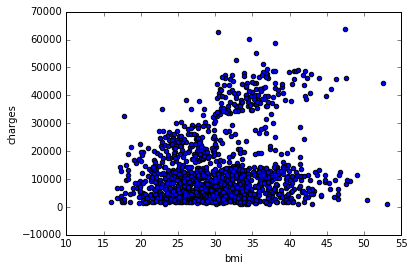

In [18]:
df1.plot.scatter('bmi', 'charges')

In [19]:
#bmi 가 30 이상인 경우는 상당히 비만인 것 같은데 그 경우 보험료가 더 비쌀까?
fat = df2[df2['bmi'] >= 30]
not_fat = df2[df2['bmi'] < 30]

In [20]:
np.mean(fat['charges'])

15552.335468868458

In [21]:
np.mean(not_fat['charges'])

10713.666900584787

In [22]:
#위의 정보를 데이터에 어떻게 반영할까? -> discretize
df3 = df2.copy()
df3['bmi30'] = df2['bmi'].map(lambda x: 1 if x >= 30 else 0)##code : bmi가 30보다 크거나 같으면 1, 아니면 0


# for i in df2['bmi']:
#     bmi30 = []
#     if i >= 30:
#         bmi30.append(1)
#     else:
#         bmi30.append(0)
        


In [23]:
df3.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male,age_square,bmi30
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,361,0
1,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,1.0,324,1
2,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,1.0,784,1
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,1.0,1089,0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,1.0,1024,0


In [24]:
train, test = train_test_split(df3, test_size = 0.3, random_state=42)
train_x = train.drop('charges', axis=1)
train_y = train['charges']
test_x = test.drop('charges', axis=1)
test_y = test['charges']

regr = LinearRegression()
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
np.mean((regr.predict(test_x) - test_y)**2)**0.5

5775.2527843557382

In [26]:
# 상호작용 추가
# 각 변수간의 상호작용을 추가할 수는 없을까? 예를 들어 비만과 흡연은 동시에 하면 더 악영향을 미치지 않을까?
df4 = df3.copy()
df4['bmi_smoke'] = df4['bmi30']*df4['smoker_yes']#code : 

In [27]:
train, test = train_test_split(df4, test_size = 0.3, random_state=42)
train_x = train.drop('charges', axis=1)
train_y = train['charges']
test_x = test.drop('charges', axis=1)
test_y = test['charges']

regr = LinearRegression()
regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
np.mean((regr.predict(test_x) - test_y)**2)**0.5

4287.199983278525